# Let's find out the netflix movies!!!
## And how they are formed!!

# Import Libraries & Font & File

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading file
nf = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [4]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Cleaning Data

In [5]:
#fill in the missing values
nf['director'].fillna('Not Specified', inplace=True)
nf['cast'].fillna('Not Specified', inplace=True)
nf['country'].fillna('Not Specified', inplace=True)
nf['date_added'].fillna('Not Specified', inplace=True)
nf['rating'].fillna('No Rating', inplace=True)


In [6]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
#check duplicates
nf.duplicated('title')


0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

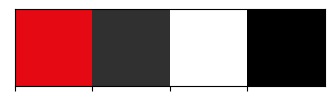

In [8]:
#netflix color palette
netflix_palette = ['#E50914','#303030','#FFFFFF', '#000000']

#show netflix color palette
sns.palplot(netflix_palette)

In [9]:
# Count the number of movies and TV shows
type_counts = nf['type'].value_counts(normalize=True)

# Create pie chart showing the ratio of movies to TV shows
fig = px.pie(values=type_counts.values, names=type_counts.index,
             color_discrete_sequence=netflix_palette, 
             title='Ratio of Movies to TV Shows')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


## Country Distribution

In [10]:
# 计算每个国家的出现次数和占比
country_list = nf['country'].dropna().str.split(", ")
countries_df = pd.DataFrame({
    'country':[country for countries in country_list for country in countries if country != 'Not Specified']
})
country_counts = countries_df['country'].value_counts(normalize=True)

# 将小于2%的国家添加到“其他”类别中
lowThresh = 0.01
other_countries = country_counts[country_counts < lowThresh].index.tolist()
country_counts['Others'] = country_counts[other_countries].sum()
country_counts.drop(other_countries, inplace=True)

# 创建图表并更新以显示“其他”类别
color_map = {k: v for k, v in zip(country_counts.index, netflix_palette)}
fig = px.pie(values=country_counts.values, names=country_counts.index, color_discrete_sequence=netflix_palette)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Country Ratio')
fig.show()


## Rating ratio

In [11]:
#find the number of movies and tv shows
# 分别统计电影和电视剧中不同分级的数量
movie_ratings = nf[nf['type'] == 'Movie']['rating'].value_counts()
tv_ratings = nf[nf['type'] == 'TV Show']['rating'].value_counts()

# 绘制电影分级占比统计图
movie_ratings = movie_ratings.drop(['TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-G', 'TV-14'])
fig1 = px.pie(values=movie_ratings, names=movie_ratings.index, color_discrete_sequence=netflix_palette)
fig1.update_traces(textposition='inside', textinfo='percent+label')
fig1.update_layout(title_text='Movie Rating Proportions')
fig1.show()

# 绘制电视剧分级占比统计图
tv_ratings = tv_ratings.drop(['R', 'NR'])
fig2 = px.pie(values=tv_ratings, names=tv_ratings.index, color_discrete_sequence=netflix_palette)
fig2.update_traces(textposition='inside', textinfo='percent+label')
fig2.update_layout(title_text='TV Show Rating Proportions')
fig2.show()

In [12]:
# The actor in the Top K of frequency
k = 15

cast_list = nf['cast'].str.split(", ")
cast_df = pd.DataFrame({
    'actor':[actor for cast in cast_list for actor in cast if actor != "Not Specified"]
})
cast_counts = cast_df['actor'].value_counts()
top_k_cast_counts = cast_counts.head(k)

# Bar chart creating
fig = px.bar(x=top_k_cast_counts.index, y=top_k_cast_counts.values, color=top_k_cast_counts.values,
             color_continuous_scale=netflix_palette[::-1],
             labels={'x':'Actor', 'y':'Count'},
             title='Top {} Actor Participants'.format(k))
fig.show()



In [13]:
# The director in the Top K of frequency
k = 15

dirc_df = pd.DataFrame({
    'director':[director for director in nf['director'] if director != "Not Specified"]
})
dirc_counts = dirc_df['director'].value_counts()
top_k_dirc_counts = dirc_counts.head(k)

# Bar chart creating
fig = px.bar(x=top_k_dirc_counts.index, y=top_k_dirc_counts.values, color=top_k_cast_counts.values,
             color_continuous_scale=netflix_palette[::-1],
             labels={'x':'Director', 'y':'Count'},
             title='Top {} Director'.format(k))
fig.show()

In [14]:
d1 = nf[nf["type"] == "TV Show"]
d2 = nf[nf["type"] == "Movie"]
col = "release_year"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], mode="lines+markers", name="TV Shows", line=dict(color='#E50914', width=3))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], mode="lines+markers", name="Movies", line=dict(color='#303030', width=3))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

## Indian - Country analysis

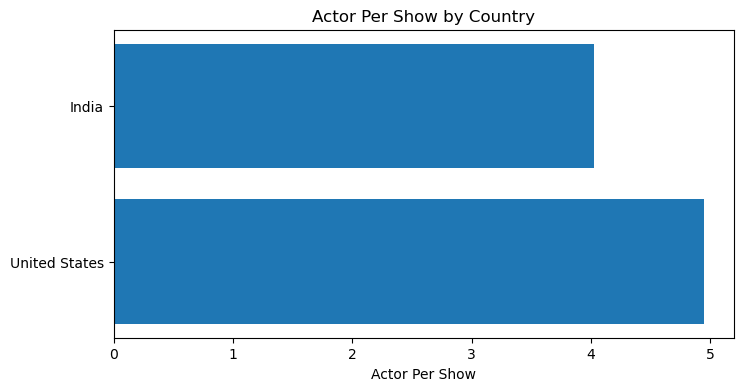

In [15]:
# 将国家名称拆分成多个行
countries = nf['country'].str.split(", ", expand=True).stack().reset_index(level=1, drop=True).rename('country')

# 将演员名称拆分成多个行，并去除重复项
actors = nf['cast'].str.split(", ", expand=True).stack().reset_index(level=1, drop=True).rename('actor').drop_duplicates()

# 合并国家和演员信息，并进行分组计数
country_actors = pd.merge(countries, actors, left_index=True, right_index=True)
country_actors = country_actors.join(nf['show_id']).reset_index(drop=True)
country_actor_counts = country_actors.groupby('country').agg({'actor': pd.Series.nunique, 'show_id': pd.Series.nunique})
country_actor_counts['actor_per_show'] = country_actor_counts['actor'] / country_actor_counts['show_id']

# 选取美国和印度的数据
selected_countries = ['United States', 'India']
selected_country_actor_counts = country_actor_counts.loc[selected_countries]

# 按照 actor_per_show 从高到低排序
selected_country_actor_counts = selected_country_actor_counts.sort_values('actor_per_show', ascending=False)

# 生成水平柱形图
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(selected_country_actor_counts.index, selected_country_actor_counts['actor_per_show'], color='tab:blue')
ax.set_xlabel('Actor Per Show')
ax.set_title('Actor Per Show by Country')
plt.show()


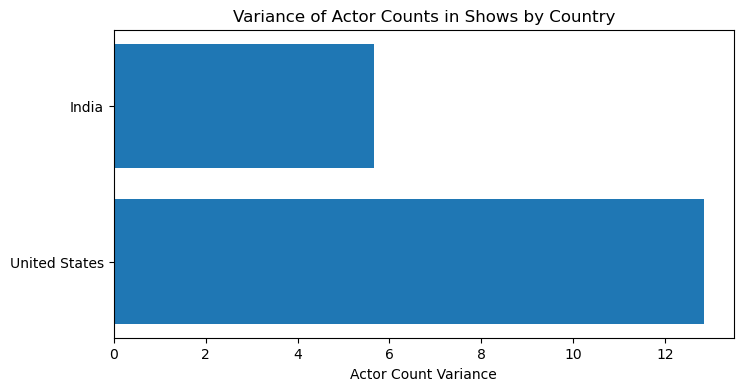

In [16]:

# 计算每个国家每部剧集的演员数量
country_show_actor_counts = country_actors.groupby(['country', 'show_id']).agg({'actor': pd.Series.nunique}).reset_index()

# 计算各个国家的方差
country_actor_variance = country_show_actor_counts.groupby('country').agg({'actor': pd.Series.var})

# 选取美国和印度的数据
selected_country_actor_variance = country_actor_variance.loc[selected_countries]

# 按照 actor 方差从高到低排序
selected_country_actor_variance = selected_country_actor_variance.sort_values('actor', ascending=False)

# 生成水平柱形图
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(selected_country_actor_variance.index, selected_country_actor_variance['actor'], color='tab:blue')
ax.set_xlabel('Actor Count Variance')
ax.set_title('Variance of Actor Counts in Shows by Country')
plt.show()


In [17]:
# The actor in the Top K of frequency
k = 150

cast_list = nf['cast'].str.split(", ")
cast_df = pd.DataFrame({
    'actor':[actor for cast in cast_list for actor in cast if actor != "Not Specified"]
})
cast_counts = cast_df['actor'].value_counts()
top_k_cast_counts = cast_counts.head(k)

# Get nationality distribution for top k actors
nationality_counts = {}
for actor in top_k_cast_counts.index:
    actor_df = nf[nf['cast'].str.contains(actor) & (nf['country'] != 'Not Specified')]
    nationality_counts[actor] = actor_df['country'].value_counts(normalize=True).to_dict()

# Sum up nationality counts for top k actors
nationality_sum = {}
for actor in nationality_counts.keys():
    for country, count in nationality_counts[actor].items():
        if country not in nationality_sum:
            nationality_sum[country] = count
        else:
            nationality_sum[country] += count

# Calculate country counts and ratios
country_counts = pd.Series(nationality_sum).sort_values(ascending=False)
country_ratios = country_counts / country_counts.sum()

# Add small countries to "Others" category
low_thresh = 0.02
other_countries = country_ratios[country_ratios < low_thresh].index.tolist()
country_ratios['Others'] = country_ratios[other_countries].sum()
country_ratios.drop(other_countries, inplace=True)

# Create pie chart showing nationality distribution for top k actors
fig = px.pie(values=country_ratios.values, names=country_ratios.index, 
             title='Nationality Distribution of Top {} Actors'.format(k), 
              color_discrete_sequence=netflix_palette)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


## Adult Content(Nothing Interesting)

In [18]:
#find genres of movies and tv shows
nf['listed_in'].value_counts()

#with the commma, we can split the genres
nf['listed_in'].str.split(',').explode().value_counts()

#find the number of movies and tv shows by genre
nf['listed_in'].str.split(',').explode().value_counts()

#remove the space in front of the genre
nf['listed_in'].str.split(',').explode().str.strip().value_counts()

#find the number of movies and tv shows by genre
nf['listed_in'].str.split(',').explode().str.strip().value_counts()

#remove if there is TV Shows, Movies, Tv in the genre
nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').value_counts()

#remove space in front of the genre
nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().value_counts()

#drop blank genre
nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().value_counts()

#make graph of the number of movies and tv shows by genre with plotly
#opposite color
fig = px.bar(nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().value_counts(), color=nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().value_counts(), color_continuous_scale=netflix_palette[::-1])
fig.update_layout(title_text='Number of Movies and TV Shows by Genre')
fig.show()


## Heavy movie director

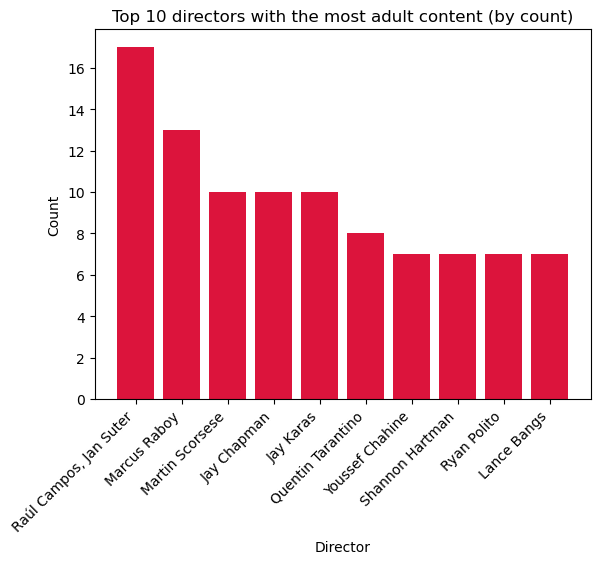

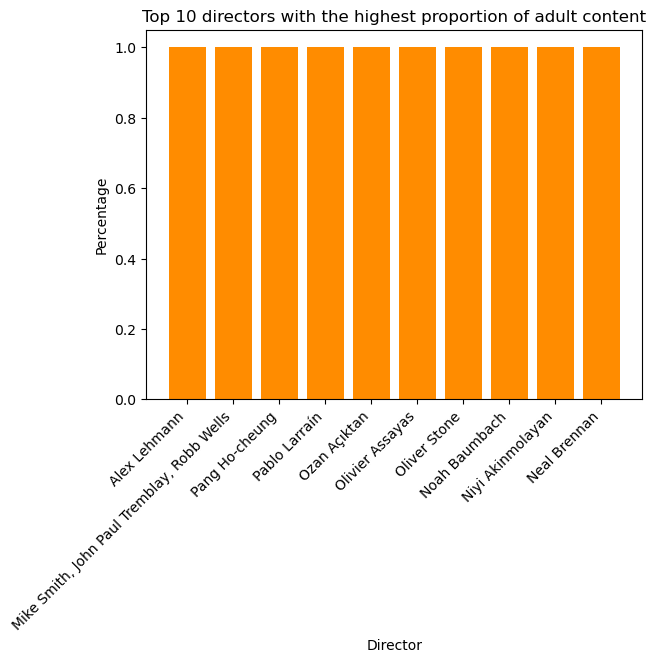

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 筛选出评级为 R 和 TV-MA 的项目，以及导演名不为 Not Specified 的项目
adult_content = nf[(nf['rating'].isin(['TV-MA', 'R'])) & (nf['director'] != 'Not Specified')][['director', 'rating']]

# 计算每个导演作品数量和成人级作品数量
director_counts = adult_content.groupby('director').size().reset_index(name='total')
adult_counts = adult_content[adult_content['rating'].isin(['TV-MA', 'R'])].groupby('director').size().reset_index(name='adult')

# 将作品数量合并到一张表中
director_counts = pd.merge(director_counts, adult_counts, on='director', how='left').fillna(0)

# 只统计拍摄作品数量大于等于3的导演的成人级作品比例
director_counts = director_counts[director_counts['total'] >= 3]
director_counts['percent'] = director_counts['adult'] / director_counts['total']

# 按成人级作品数量排序的结果
k = 10
top_k_counts = director_counts.sort_values('adult', ascending=False).head(k)

# 按成人级作品比例排序的结果
top_k_percent = director_counts.sort_values('percent', ascending=False).head(k)

# 绘制成人级作品数量的条形图
plt.bar(top_k_counts['director'], top_k_counts['adult'], color='crimson')
plt.title(f'Top {k} directors with the most adult content (by count)')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# 绘制成人级作品比例的条形图
plt.bar(top_k_percent['director'], top_k_percent['percent'], color='darkorange')
plt.title(f'Top {k} directors with the highest proportion of adult content')
plt.xlabel('Director')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()


In [20]:
# 输出符合条件的导演数量
directors = director_counts[(director_counts['total'] >= 3) & (director_counts['adult'] == director_counts['total'])]['director']
print(f"There are {len(directors)} directors who have only directed adult content and have directed 3 or more titles.")

There are 102 directors who have only directed adult content and have directed 3 or more titles.


### Use Generes to find some relevancy between genres
Cast\Director

In [21]:
#make new dataframe with this nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().value_counts()
nf_genres = nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().value_counts().to_frame().reset_index()
nf_genres


#if movie or tv show has genre, it will be 1, if not, it will be 0
nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().unique()

#make new column for each genre and make new dataframe
for genre in nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().unique():
    nf[genre] = nf['listed_in'].str.contains(genre).astype(int)

nf




,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Anime Series,Korean,Science & Nature,Teen,Cult,Faith & Spirituality,LGBTQ,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,Classic & Cult
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Specified,United States,"September 25, 2021",2020,PG-13,90 min,...,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,Not Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,0,0,0,0,0,0,0,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Specified,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,Not Specified,Not Specified,Not Specified,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,Not Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,...,0,0,0,0,1,0,0,0,0,0
8803,s8804,TV Show,Zombie Dumb,Not Specified,Not Specified,Not Specified,"July 1, 2019",2018,TV-Y7,2 Seasons,...,0,1,0,0,0,0,0,0,0,0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,...,0,0,0,0,0,0,0,0,0,0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#correlation matrix of nf
nf.corr()

,release_year,Documentaries,International,Dramas,Mysteries,Crime,Action & Adventure,Docuseries,Reality,Romantic,...,Anime Series,Korean,Science & Nature,Teen,Cult,Faith & Spirituality,LGBTQ,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,Classic & Cult
release_year,1.000000,0.040990,0.064467,-0.032918,0.050120,0.094422,-0.138201,0.075011,0.072721,-0.005009,...,0.013551,0.035785,0.031839,0.021696,-0.213093,0.015838,0.028715,0.042971,0.033354,-0.067480
Documentaries,0.040990,1.000000,-0.083081,-0.246967,-0.035098,-0.078559,-0.111909,-0.071697,-0.057133,-0.117479,...,-0.047248,-0.043700,-0.033995,-0.029402,-0.031667,0.024850,0.081618,-0.068415,-0.026468,-0.018686
International,0.064467,-0.083081,1.000000,0.241927,-0.007934,0.081055,-0.005999,-0.073708,-0.026877,0.164334,...,0.071575,0.101091,-0.066853,-0.015867,-0.065036,-0.032663,-0.037272,-0.183749,-0.023165,-0.024441
Dramas,-0.032918,-0.246967,0.241927,1.000000,0.059687,0.010259,-0.062558,-0.159878,-0.128722,0.053089,...,-0.107614,-0.066777,-0.075105,0.018776,-0.044500,0.056460,0.013368,-0.164166,-0.060285,-0.025774
Mysteries,0.050120,-0.035098,-0.007934,0.059687,1.000000,0.085579,-0.014933,-0.002068,-0.011862,-0.034232,...,-0.015148,-0.014011,-0.010899,0.002851,-0.001043,-0.009147,-0.011483,-0.017904,0.005132,0.013237
Crime,0.094422,-0.078559,0.081055,0.010259,0.085579,1.000000,-0.021733,0.204829,-0.037987,-0.068283,...,0.023852,0.046472,-0.014458,-0.015369,-0.001358,-0.020474,-0.025702,-0.051723,-0.018994,0.031459
Action & Adventure,-0.138201,-0.111909,-0.005999,-0.062558,-0.014933,-0.021733,1.000000,-0.075312,-0.056409,-0.106564,...,-0.049355,-0.031636,-0.026891,-0.028273,0.051863,-0.018929,-0.039329,-0.079147,-0.029064,0.023471
Docuseries,0.075011,-0.071697,-0.073708,-0.159878,-0.002068,0.204829,-0.075312,1.000000,0.054190,-0.076941,...,-0.030944,-0.028621,0.452562,-0.013034,-0.023105,-0.018685,-0.023457,-0.039292,0.003371,-0.012238
Reality,0.072721,-0.057133,-0.026877,-0.128722,-0.011862,-0.037987,-0.056409,0.054190,1.000000,-0.014064,...,-0.024658,0.008492,0.042201,0.015378,-0.018412,-0.014890,-0.018692,-0.037616,-0.013813,-0.009752
Romantic,-0.005009,-0.117479,0.164334,0.053089,-0.034232,-0.068283,-0.106564,-0.076941,-0.014064,1.000000,...,-0.014678,0.133416,-0.036481,0.009292,-0.037859,-0.013788,-0.021606,-0.077348,-0.028404,-0.020052


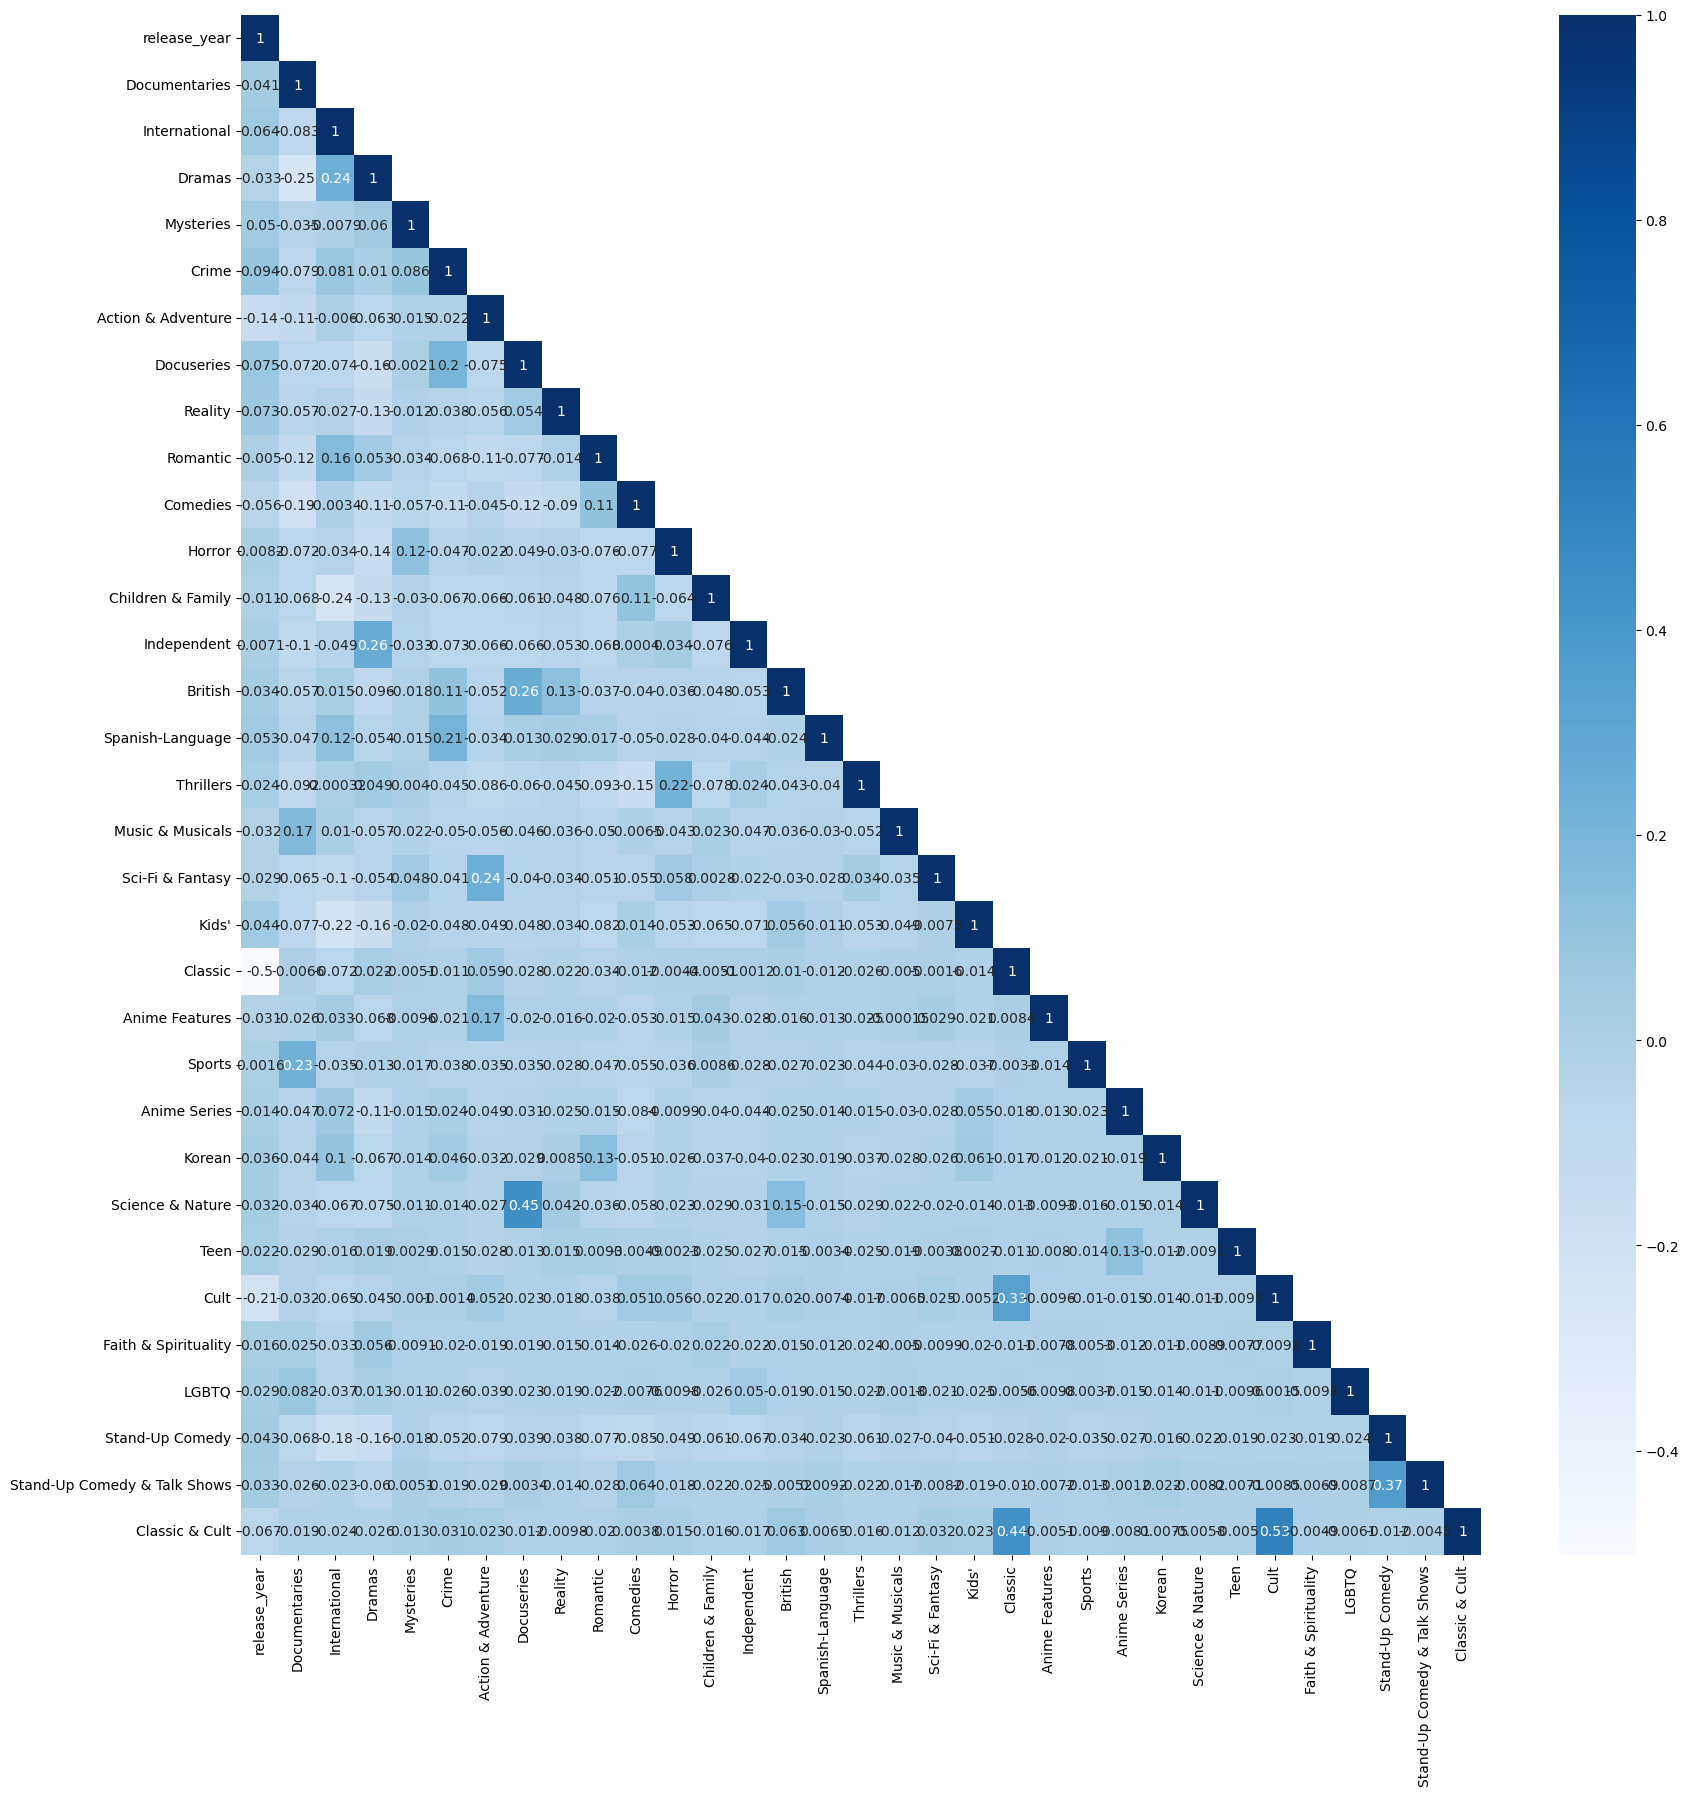

In [23]:
#Heatma
plt.figure(figsize=(20,20))
sns.heatmap(nf.corr(), annot=True, cmap='Blues', mask=np.triu(nf.corr(), k=1))
plt.show()